In [3]:
from pathlib import Path
import os
import polars as pl
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_folder = Path("data")
for root, dir, file in os.walk(data_folder):
    print(f"This is root: {root} containing {len(file)} files {file} | in {dir} folders")

This is root: data containing 5 files ['american_sign_language.PNG', 'amer_sign2.png', 'amer_sign3.png', 'sign_mnist_test.csv', 'sign_mnist_train.csv'] | in ['sign_mnist_test', 'sign_mnist_train'] folders
This is root: data/sign_mnist_test containing 1 files ['sign_mnist_test.csv'] | in [] folders
This is root: data/sign_mnist_train containing 1 files ['sign_mnist_train.csv'] | in [] folders


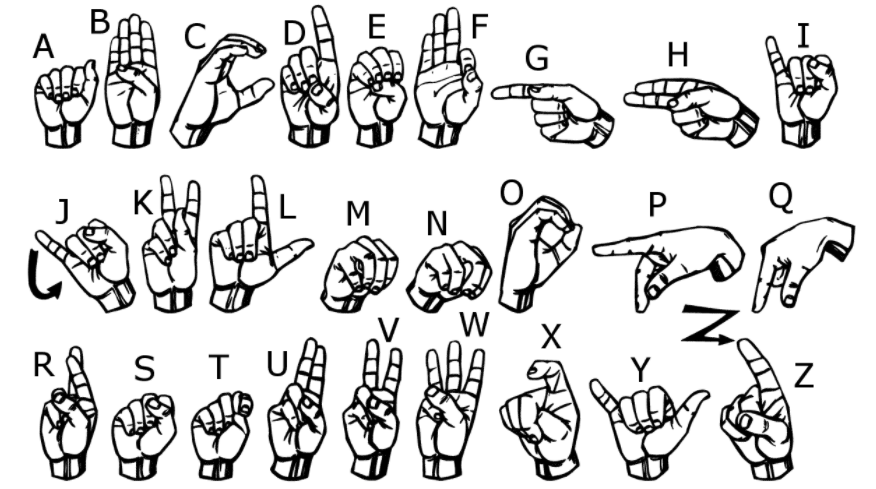

In [5]:
img = Image.open(data_folder / "american_sign_language.PNG")
img

In [6]:
df_train = pl.read_csv(data_folder / "sign_mnist_train.csv")
df_train.head()

label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,…,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,…,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,…,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,…,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,…,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,…,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [7]:
# print(df_train['label'].unique())
# print(df_train['label'].value_counts())

In [8]:
images = df_train.drop("label").to_numpy()
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
images.shape

(27455, 784)

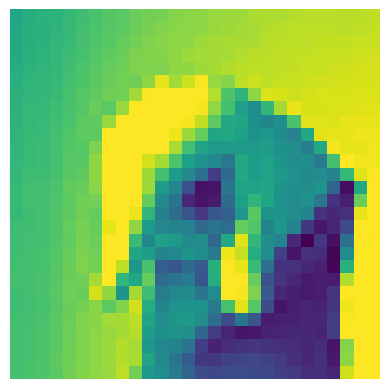

In [9]:
plt.imshow(images[5].reshape(28,28))
plt.axis('off');

In [10]:
df_test = pl.read_csv(data_folder / "sign_mnist_test.csv")

In [11]:
X_train = df_train.drop("label")
y_train = df_train["label"]
print(X_train.shape, y_train.shape)

X_test = df_test.drop("label")
y_test = df_test["label"]
print(X_test.shape, y_test.shape)

(27455, 784) (27455,)
(7172, 784) (7172,)


# Using RF

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
grid = GridSearchCV(RandomForestClassifier(), 
                    param_grid = {'n_estimators': [50, 100, 200], 
                                  'max_depth': [5, 10, 20]}, 
                    cv = 5, 
                    verbose=True, 
                    n_jobs=-1
                    )

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 20, 'n_estimators': 200}
0.9974867965762156


In [29]:
model = RandomForestClassifier(n_estimators=200, max_depth=20)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [30]:
model.score(X_test,y_test)*100

81.90184049079755

# Save & Load

In [31]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [32]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

# Predictions

(1080, 1000, 3)


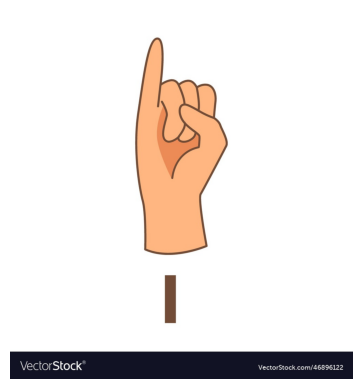

In [56]:
import cv2

i_sign = cv2.imread("i-sign.jpg")
print(i_sign.shape)
plt.imshow(cv2.cvtColor(i_sign, cv2.COLOR_BGR2RGB))
plt.axis('off');

(1080, 1000)


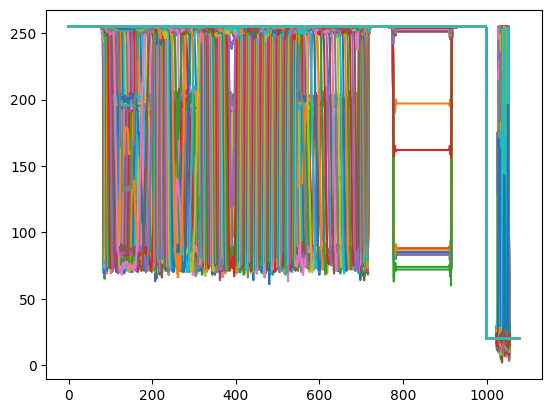

In [57]:
# i_sign = cv2.resize(i_sign, (28, 28))
i_sign = cv2.cvtColor(i_sign, cv2.COLOR_BGR2GRAY)
print(i_sign.shape)
plt.plot(i_sign);